# Import data and basic info and head operation

In [69]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("marketing_data.csv")

# Display basic information about the dataset
print(df.info())

# Display the first 5 rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly. Basically I am investigating if all variabled present in data dictionary csv are present as columns in the dataset.

In [70]:
# Load data dictionary
data_dict = pd.read_csv("data_dictionary.csv")

# Extract expected column names from the 'Variable' column in data dictionary
expected_columns = data_dict["Variable"].dropna().astype(str).str.strip().unique().tolist()

# Get actual column names from the dataset
actual_columns = df.columns.str.strip().tolist()

# Check which columns are missing or matched
not_found_columns = [col for col in expected_columns if col not in actual_columns]
found_columns = [col for col in expected_columns if col in actual_columns]

# Print results
print("Matched columns:")
print(found_columns)

if not not_found_columns:
    print("All columns in the data dictionary are present in the dataset.")
else:
    print("Columns from the data dictionary that are missing in the dataset:")
    print(not_found_columns)

Matched columns:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']
All columns in the data dictionary are present in the dataset.


# Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status. 

In [71]:
# Income values are missing for some customers. Missing Value manipulation.

# Look into different kinds of education categories and marriage categories

# Show unique values
print("Unique Education values:")
print(df['Education'].dropna().unique())

print("\nUnique Marital_Status values:")
print(df['Marital_Status'].dropna().unique())

Unique Education values:
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Unique Marital_Status values:
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [72]:
# Clean Marital_Status
marital_map = {
    'Married': 'Married',
    'Together': 'Married',
    'Single': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single',
    'Divorced': 'Divorced',
    'Widow': 'Widow'
}
df['Marital_Status_Clean'] = df['Marital_Status'].map(marital_map)

# Now again checking marital status unique values
print(df['Marital_Status_Clean'].dropna().unique())

['Divorced' 'Single' 'Married' 'Widow']


In [73]:
print(df.columns)

# We see Income col has white spaces
df.columns = df.columns.str.strip()

print(f"Income column is present in dataframe - {'Income' in df.columns}")

# Check if income column has numeric values
print(f"Datatype of income col - {df['Income'].dtype}")

# Make income column values as numeric
# Remove dollar signs and commas, then convert to float
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

print(f"After removing dollar sign from Income col - {df['Income'].dtype}")

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country',
       'Marital_Status_Clean'],
      dtype='object')
Income column is present in dataframe - True
Datatype of income col - object
After removing dollar sign from Income col - float64


In [74]:
# Calculate mean income per (Education, Marital_Status_Clean) group
group_means = df.groupby(['Education', 'Marital_Status_Clean'])['Income'].mean()
print(group_means)

Education   Marital_Status_Clean
2n Cycle    Divorced                49395.130435
            Married                 45597.992647
            Single                  53673.944444
            Widow                   51392.200000
Basic       Divorced                 9548.000000
            Married                 21663.852941
            Single                  18238.666667
            Widow                   22123.000000
Graduation  Divorced                54526.042017
            Married                 52779.380952
            Single                  51365.633065
            Widow                   54976.657143
Master      Divorced                50331.945946
            Married                 52785.795833
            Single                  53787.142857
            Widow                   58401.545455
PhD         Divorced                53096.615385
            Married                 57343.238562
            Single                  53039.666667
            Widow                   

In [75]:
print("Missing income values:", df['Income'].isnull().sum())

# Compute missing incomes
def Compute_income(row):
    if pd.isnull(row['Income']):
        return group_means.get((row['Education'], row['Marital_Status_Clean']), None)
    return row['Income']

df['Income'] = df.apply(Compute_income, axis=1)

# Check if any missing incomes remain
print("Missing income values:", df['Income'].isnull().sum())

Missing income values: 24
Missing income values: 0


# Create variables to populate the total number of children, age, and total spending. 

In [76]:
# Total_Children: Sum of Kidhome and Teenhome.
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [77]:
# Age: Derived from Year_Birth. 
# Age = 2025 - Year_Birth

df['Age'] = 2025 - df['Year_Birth']

In [78]:
# Total_Spending:
# Sum of all monetary columns: MntWines , MntFruits , MntMeatProducts , MntFishProducts , MntSweetProducts , MntGoldProds

df['Total_Spending'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

In [79]:
# Total_Purchases :
# Sum of: NumWebPurchases , NumCatalogPurchases , NumStorePurchases

df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

In [80]:
# Preview result
print(df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head())

   Total_Children  Age  Total_Spending  Total_Purchases
0               0   55            1190               14
1               0   64             577               17
2               1   67             251               10
3               2   58              11                3
4               1   36              91                6


# Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

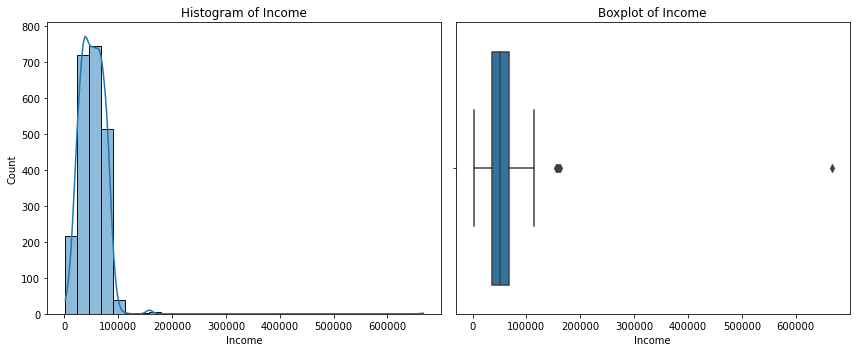

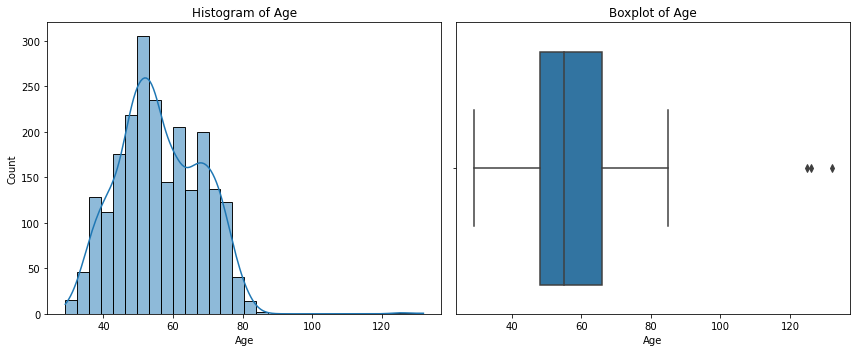

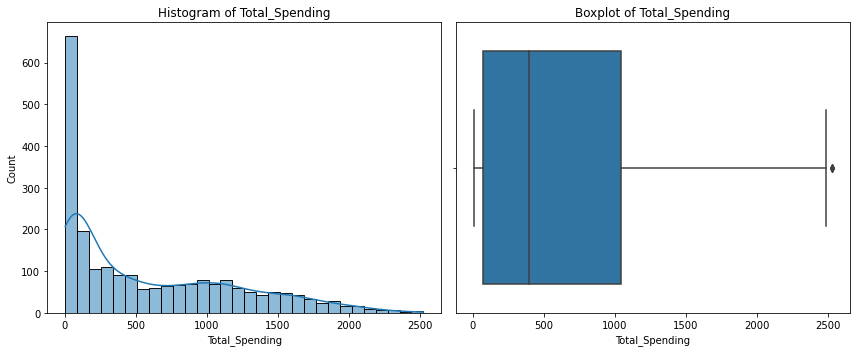

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
cols_to_plot = ['Income', 'Age', 'Total_Spending']

for col in cols_to_plot:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


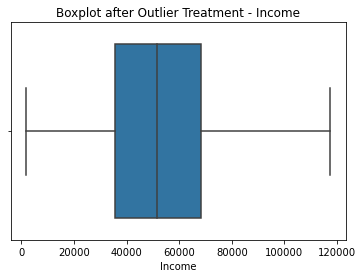

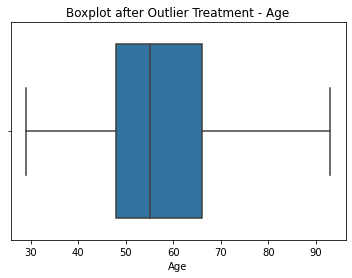

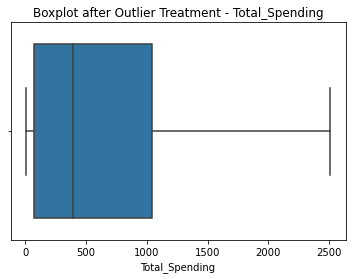

In [82]:
# Outlier treatment using IQR
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply treatment to each numerical column
for col in cols_to_plot:
    treat_outliers_iqr(df, col)

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot after Outlier Treatment - {col}')
    plt.show()


# Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [83]:
# Ordinal (has natural order): Education → ['Basic' < '2n Cycle' < 'Graduation' < 'Master' < 'PhD']

from sklearn.preprocessing import OrdinalEncoder

# Define order of education levels
edu_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Create encoder and apply
ordinal_encoder = OrdinalEncoder(categories=[edu_order])
df['Education_Encoded'] = ordinal_encoder.fit_transform(df[['Education']])


In [84]:
# Nominal (no natural order): Marital_Status_Clean , Country , Possibly Complain, Response, etc.

# Using pandas.get_dummies for nominal features
df = pd.get_dummies(df, columns=['Marital_Status_Clean', 'Country'], drop_first=True)

In [85]:
df.columns

print(df.head())

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Marital_Status_Clean_Married  \
0     6/16/14        0       189  ...                             0   
1     6/15/14        0       464  ...                             0   
2     5/13/14        0       134  ...                             1   
3     5/11/14        0        10  ...                             1   
4      4/8/14        0         6  ...                             0   

   Marital_Status_Clean_Single  Marital_Status_Clean_Widow  Country_CA  \
0                       

# Create a heatmap to showcase the correlation between different pairs of variables.

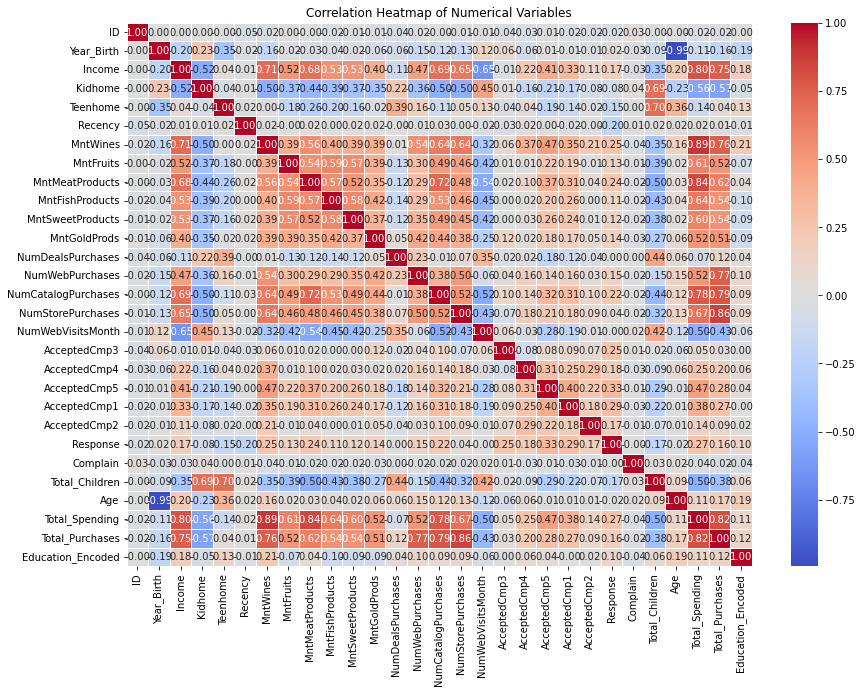

In [86]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

<AxesSubplot:>

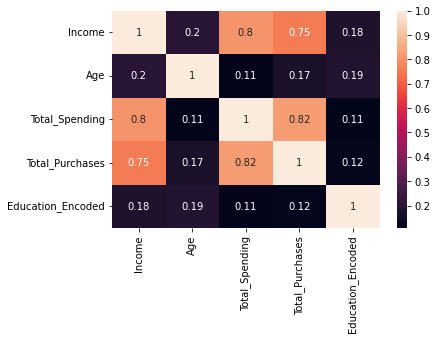

In [87]:
# Plotting for selected cols
subset = ['Income', 'Age', 'Total_Spending', 'Total_Purchases', 'Education_Encoded']
sns.heatmap(df[subset].corr(), annot=True)

# Hypothesis

# Hypothesis - 1

In [88]:
# Hypothesis no 1- Older people are not as tech-savvy and probably prefer shopping in-store.
from scipy.stats import pearsonr

# Correlation between Age and different purchase channels
age_store_corr, _ = pearsonr(df['Age'], df['NumStorePurchases'])
age_web_corr, _ = pearsonr(df['Age'], df['NumWebPurchases'])

print(f"Correlation between Age and Store Purchases: {age_store_corr:.2f}")
print(f"Correlation between Age and Web Purchases: {age_web_corr:.2f}")


Correlation between Age and Store Purchases: 0.13
Correlation between Age and Web Purchases: 0.15


##### Both correlations are positive — this means:

##### As age increases, the number of store purchases and web purchases also slightly increases.

##### However, the relationship is very weak (correlations are close to 0).

##### --------------------

##### What does this say about older people?

##### If the hypothesis were true ("older people prefer shopping in-store and not online"), we would expect:

##### A positive correlation with store purchases -- yes 

##### A negative correlation with web purchases --- no

# Hypothesis no 2

In [89]:
# Hypothesis no 2 - Customers with kids probably have less time to visit a store and would prefer to shop online.
# Correlation with Total_Children
kid_web_corr, _ = pearsonr(df['Total_Children'], df['NumWebPurchases'])
kid_store_corr, _ = pearsonr(df['Total_Children'], df['NumStorePurchases'])

print(f"Correlation between Kids and Web Purchases: {kid_web_corr:.2f}")
print(f"Correlation between Kids and Store Purchases: {kid_store_corr:.2f}")


Correlation between Kids and Web Purchases: -0.15
Correlation between Kids and Store Purchases: -0.32


##### Both correlations are negative.

##### As the number of children increases, both web and store purchases decrease.

##### The drop is more significant for store purchases 

##### hence it is correct to say that customers with kids prefer to shop online and not from store

# Hypothesis 3

In [90]:
# Hypothesis no 3 - Other distribution channels may cannibalize sales at the store.

web_store_corr, _ = pearsonr(df['NumWebPurchases'], df['NumStorePurchases'])
catalog_store_corr, _ = pearsonr(df['NumCatalogPurchases'], df['NumStorePurchases'])

print(f"Web vs Store Purchases Correlation: {web_store_corr:.2f}")
print(f"Catalog vs Store Purchases Correlation: {catalog_store_corr:.2f}")


Web vs Store Purchases Correlation: 0.50
Catalog vs Store Purchases Correlation: 0.52


# Hypothesis 4

In [91]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Total_Children', 'Age',
       'Total_Spending', 'Total_Purchases', 'Education_Encoded',
       'Marital_Status_Clean_Married', 'Marital_Status_Clean_Single',
       'Marital_Status_Clean_Widow', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US'],
      dtype='object')

In [92]:
# Hypothesis no 4 - Does the US fare significantly better than the rest of the world in terms of total purchases?
import numpy as np
from scipy.stats import ttest_ind

# Create boolean mask
us_customers = df[df['Country_US'] == 1]['Total_Purchases']
non_us_customers = df[df['Country_US'] == 0]['Total_Purchases']

# Perform t-test
t_stat, p_value = ttest_ind(us_customers, non_us_customers, equal_var=False)

print(f"Mean (US): {us_customers.mean():.2f}")
print(f"Mean (Non-US): {non_us_customers.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")



Mean (US): 13.51
Mean (Non-US): 12.49
T-statistic: 1.468, P-value: 0.1447


##### The US average is slightly higher (~1 more purchase on average).

##### However, the p-value = 0.1447 is greater than 0.05. Hence it is not right to say us country is performing better

# Use appropriate visualization to help analyze the following:

# Question 1

In [93]:
# Which products are performing the best, and which are performing the least in terms of revenue?
# Select spending columns
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Sum revenue across all customers
product_revenue = df[spending_cols].sum().sort_values(ascending=False)

# Display results
print("Total Revenue by Product Type:")
print(product_revenue)


Total Revenue by Product Type:
MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


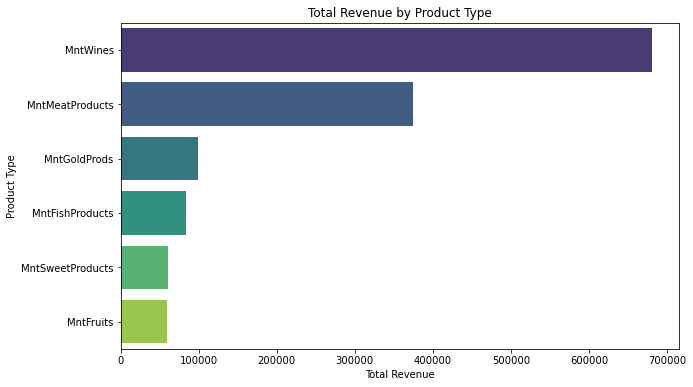

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis')
plt.title('Total Revenue by Product Type')
plt.xlabel('Total Revenue')
plt.ylabel('Product Type')
plt.show()

# Question 2

In [95]:
# Is there any pattern between the age of customers and the last campaign acceptance rate?

correlation = df['Age'].corr(df['Response'])
print(f"Correlation between Age and Campaign Response: {correlation:.2f}")


Correlation between Age and Campaign Response: -0.02


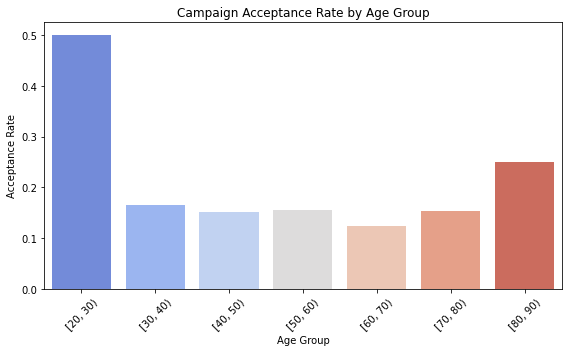

In [96]:
# Bin age into groups
df['Age_Bin'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80,90], right=False)

# Calculate mean response rate per age bin
age_response = df.groupby('Age_Bin')['Response'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=age_response, x='Age_Bin', y='Response', palette='coolwarm')
plt.title("Campaign Acceptance Rate by Age Group")
plt.ylabel("Acceptance Rate")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### A correlation -0.02 suggests virtually no linear relationship between age and whether someone accepted the last campaign.

##### Age group of 20 to 30 has maximum acceptance rate and then the acceptance rate goes slightly decresing 

# Question 3

Country with the most campaign acceptances:
Country_SP    176
dtype: int64


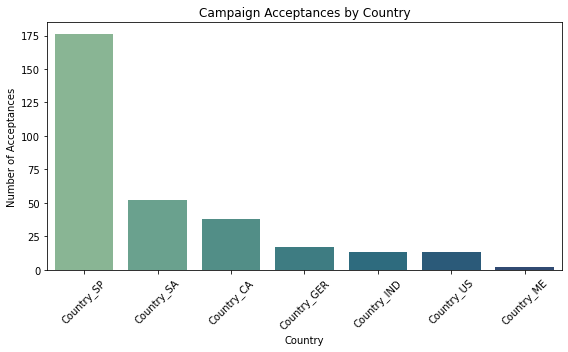

In [97]:
# Which Country has the greatest number of customers who accepted the last campaign?

# Extract country columns (assuming all start with 'Country_')
country_cols = [col for col in df.columns if col.startswith('Country_')]

acceptance_by_country = df[country_cols].multiply(df['Response'], axis=0)

# Sum each country column to get total acceptances
country_acceptance_counts = acceptance_by_country.sum().sort_values(ascending=False)


# top country
print("Country with the most campaign acceptances:")
print(country_acceptance_counts.head(1))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=country_acceptance_counts.index, y=country_acceptance_counts.values, palette="crest")
plt.title("Campaign Acceptances by Country")
plt.ylabel("Number of Acceptances")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Question 4

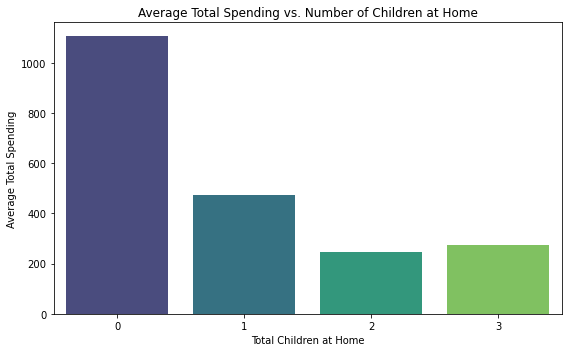

In [98]:
# Do you see any pattern in the no. of children at home and total spend?

# Group by number of children and calculate average spending
spending_by_children = df.groupby('Total_Children')['Total_Spending'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=spending_by_children, x='Total_Children', y='Total_Spending', palette='viridis')
plt.title("Average Total Spending vs. Number of Children at Home")
plt.xlabel("Total Children at Home")
plt.ylabel("Average Total Spending")
plt.tight_layout()
plt.show()

##### total spending decreases as number of children increases, 
##### it may suggest that families with more children spend less per person (possibly due to budget constraints).

# Question 5

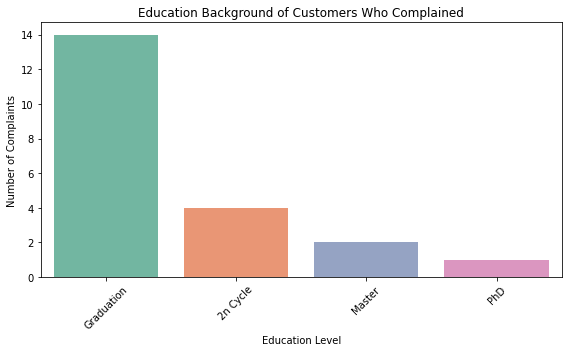

In [99]:
# Filter only customers who complained
complainers = df[df['Complain'] == 1]

# Count of education levels among complainers
edu_counts = complainers['Education'].value_counts().reset_index()
edu_counts.columns = ['Education', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=edu_counts, x='Education', y='Count', palette='Set2')
plt.title("Education Background of Customers Who Complained")
plt.ylabel("Number of Complaints")
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()